In [1]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg
from bitcoin_deep_learning.trainer import train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
api = ApiCall()

%load_ext autoreload
%autoreload 2


In [2]:
X0 = [[i+5+random.random(),-2*i+random.randint(1,500)]for i in range(1001)]
X1 = np.sin(np.arange(1001))

In [3]:
df = pd.DataFrame(X0)
df["date"] = X1
df

,0,1,date
0,5.991631,242,0.000000
1,6.051223,129,0.841471
2,7.256536,438,0.909297
3,8.294209,488,0.141120
4,9.772380,133,-0.756802
...,...,...,...
996,1001.589327,-1674,-0.114875
997,1002.284396,-1526,-0.897967
998,1003.347637,-1882,-0.855473
999,1004.244811,-1734,-0.026461


In [4]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [5]:
past_reality[0]

array([365.65194227, 366.4242002 , 367.75680695, 368.32376135,
       369.84300429, 370.3455169 , 371.32987703, 372.74017897,
       373.34442102, 374.37586023, 375.66022432, 376.80690039,
       377.19958395, 378.61925436, 379.06049656, 380.4910941 ,
       381.66877952, 382.99561063, 383.11913369, 384.4481631 ,
       385.95215597, 386.20382784, 387.59518347, 388.87546773,
       389.88728465, 390.36037565, 391.04085596, 392.64809948,
       393.80117782, 394.14561779, 395.1958963 , 396.11058832,
       397.67459389, 398.49261776, 399.31988295, 400.697273  ,
       401.71763943, 402.15628013, 403.50101073, 404.69045951,
       405.582355  , 406.68212866, 407.75222184, 408.07605861,
       409.17846219, 410.90901838, 411.76124121, 412.27529514,
       413.85424314, 414.13636581, 415.41923748, 416.60704431,
       417.11756732, 418.41353202, 419.1155307 , 420.2454462 ,
       421.76064076, 422.7184524 , 423.84285358, 424.46507278,
       425.59401393, 426.68511916, 427.05625295, 428.70

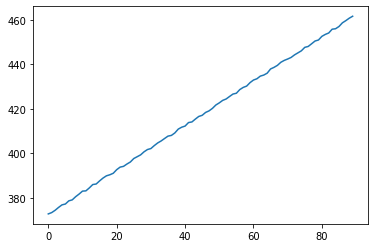

In [6]:
plt.plot(reality[0])

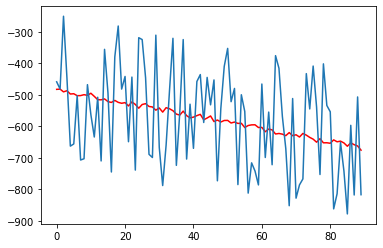

In [7]:
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [8]:
df

,0,1,date
0,5.991631,242,0.000000
1,6.051223,129,0.841471
2,7.256536,438,0.909297
3,8.294209,488,0.141120
4,9.772380,133,-0.756802
...,...,...,...
996,1001.589327,-1674,-0.114875
997,1002.284396,-1526,-0.897967
998,1003.347637,-1882,-0.855473
999,1004.244811,-1734,-0.026461


In [9]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df.drop(columns="date"),data=None)

In [10]:
X_train, Y_train, X_test,Y_test = X_train_list[0], Y_train_list[0], X_test_list[0],Y_test_list[0]

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train[:,-1,:])
X_test_scaled = scaler.transform(X_test[:,-1,:])
#X_train_scaled =  (X_train[:,-1,:])
#X_test_scaled = (X_test[:,-1,:])
X_train_scaled

array([[-1.72091501,  0.66239216],
       [-1.7076665 ,  2.13630548],
       [-1.6952631 ,  1.91846294],
       [-1.69060558,  2.22900443],
       [-1.67095147,  0.61140774],
       [-1.65845769,  0.24061193],
       [-1.64267385,  1.09807723],
       [-1.62891993,  1.72843009],
       [-1.62363908,  1.24639555],
       [-1.60022682,  1.12125197],
       [-1.59421755,  1.96481242],
       [-1.57934644,  0.83388522],
       [-1.57229048,  0.4908991 ],
       [-1.55295143,  1.36690418],
       [-1.5456953 ,  1.40861871],
       [-1.52168177,  1.07490249],
       [-1.51265265, -0.03284997],
       [-1.50246541,  0.96366375],
       [-1.48152494,  0.14791298],
       [-1.47345796,  2.02970168],
       [-1.46620612,  1.6125564 ],
       [-1.45358089,  0.48162921],
       [-1.4346816 ,  1.95554252],
       [-1.41748718,  0.45845447],
       [-1.41285979,  1.40861871],
       [-1.39917958,  1.77941452],
       [-1.38751586, -0.06992955],
       [-1.36760733,  1.95090757],
       [-1.36181922,

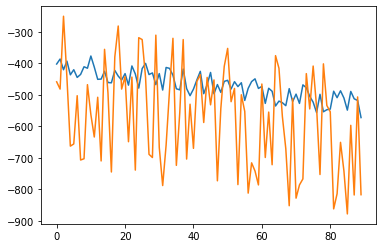

In [12]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)
plt.plot(Y_pred)
plt.plot(Y_test)

In [13]:
Y_train

array([  89,   62,  244,    0,  -74,  115,  124,   52, -187,   28, -148,
        258,  168,  -76,  242,  -81,  124,  204, -195,  241,  -66, -205,
        198,  103,  221,   -4,  -89,  -39,  136,    9,  139,  152, -113,
         12,  105,  164,  -49,  121, -187, -126, -104, -230,   -8,   83,
        213,  156, -213, -201, -237,   80, -213,  -36,   -4,   80,  -78,
       -275, -249,   47, -238, -137,  -18,   11,  123, -262, -189,  158,
       -218, -144,  -91,  138, -164,  -31,   45,  -94, -194,   81,  -35,
        -33,  -83,   10,   34,  116, -209, -232,  126,  -79,   59,  -45,
       -358,   19, -101,  -50, -328,  -53,   80, -294, -223, -276,   -8,
       -181, -306, -165,  -19,   99, -108,   15, -106,   90,  -68, -209,
       -278, -327, -249,  -46,  -94, -112, -109,   25,  -87, -244, -132,
       -313, -330,  -88,    0, -194,   -6, -382, -442, -374, -252,  -36,
        -43,   34, -344, -123, -246, -253,  -51, -108, -292, -456, -323,
       -476, -313, -196, -298, -405, -194, -405,  -

In [14]:
X_train[:,-1,:]

array([[  94.8043411 ,  -37.        ],
       [  95.81026032,  281.        ],
       [  96.75201306,  234.        ],
       [  97.10564373,  301.        ],
       [  98.59792031,  -48.        ],
       [  99.54653509, -128.        ],
       [ 100.74495416,   57.        ],
       [ 101.7892475 ,  193.        ],
       [ 102.19020637,   89.        ],
       [ 103.96782778,   62.        ],
       [ 104.42409357,  244.        ],
       [ 105.55321108,    0.        ],
       [ 106.08894883,  -74.        ],
       [ 107.5573038 ,  115.        ],
       [ 108.1082399 ,  124.        ],
       [ 109.93151447,   52.        ],
       [ 110.61706744, -187.        ],
       [ 111.39055357,   28.        ],
       [ 112.98049993, -148.        ],
       [ 113.5930008 ,  258.        ],
       [ 114.14361152,  168.        ],
       [ 115.10220612,  -76.        ],
       [ 116.53717165,  242.        ],
       [ 117.84269188,  -81.        ],
       [ 118.1940356 ,  124.        ],
       [ 119.23273232,  2

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[:,-1,:])

MinMaxScaler()

In [16]:
X_train[:,-1,:]

array([[  94.8043411 ,  -37.        ],
       [  95.81026032,  281.        ],
       [  96.75201306,  234.        ],
       [  97.10564373,  301.        ],
       [  98.59792031,  -48.        ],
       [  99.54653509, -128.        ],
       [ 100.74495416,   57.        ],
       [ 101.7892475 ,  193.        ],
       [ 102.19020637,   89.        ],
       [ 103.96782778,   62.        ],
       [ 104.42409357,  244.        ],
       [ 105.55321108,    0.        ],
       [ 106.08894883,  -74.        ],
       [ 107.5573038 ,  115.        ],
       [ 108.1082399 ,  124.        ],
       [ 109.93151447,   52.        ],
       [ 110.61706744, -187.        ],
       [ 111.39055357,   28.        ],
       [ 112.98049993, -148.        ],
       [ 113.5930008 ,  258.        ],
       [ 114.14361152,  168.        ],
       [ 115.10220612,  -76.        ],
       [ 116.53717165,  242.        ],
       [ 117.84269188,  -81.        ],
       [ 118.1940356 ,  124.        ],
       [ 119.23273232,  2

In [18]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
df = ApiCall().read_local()
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df,data=None)



In [19]:
cross_val_trade(model,df)

/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.958e-01, tolerance: 2.578e-04
  model = cd_fast.enet_coordinate_descent(
/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.841e-01, tolerance: 2.558e-04
  model = cd_fast.enet_coordinate_descent(
/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.506e-01, tolerance: 2.269e-04
  model = cd_fast.enet_coordinate_descent(
/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.707e-01, tolerance: 2.707e-04
  model = cd_fast.enet_coordinate_descent(
/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

([array([3586.69221638, 3472.33980503, 3447.03376969, 3485.3190571 ,
         3457.19185903, 3488.65467674, 3526.76852089, 3461.49672071,
         3456.78537352, 3460.72479577, 3412.83264537, 3400.6012536 ,
         3661.6593387 , 3671.81055872, 3684.24956988, 3648.09335231,
         3653.99110555, 3631.34329385, 3616.36968624, 3623.22451873,
         3631.0060736 , 3677.11835448, 3915.15393   , 3946.15354458,
         3996.90234514, 3952.2103642 , 4002.2913313 , 4145.9880905 ,
         3814.93757504, 3884.93555836, 3857.56107734, 3851.0235527 ,
         3855.67378101, 3861.87069318, 3867.57418178, 3845.59431118,
         3761.00685915, 3894.06747372, 3905.40722269, 3911.06208338,
         3898.25616475, 3960.96525724, 3953.83492806, 3906.12986299,
         3911.29620526, 3906.54189115, 3913.51736755, 3958.66898443,
         4048.90849948, 4028.84888287, 4034.67408291, 4070.48878613,
         4086.37824344, 4031.48944687, 4023.91043451, 4036.5766927 ,
         4018.86969869, 3963.78397

In [22]:
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)